In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'deepglobe-road-extraction-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F966140%2F1634186%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240429%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240429T140228Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D04d6e00d7f36f288a42089b626db055c8a86763da331f4531a0608659bd8cba6583e8cd6c78f0023e33cb868758acc5a8a04706b76c39e84b64d434268e6da94a56c0d0033e5b89814b845db14489b730c1c6600205ef4aa31660d4d7e26d362ef88026cfabe892a498b340a2f86218efb58ed1fb60648d66a83c59508e4d747139eea1a1f74f4ba8eff894dfbc64753e494be6aa5a7c71ad13aa3508153135d47909c233d01b4e3f09dfc937b9f18fb9d72f07dcd6f82c4de63885fcc098d76af60c1a4e4780eea7f92d6a64dc0cdc1fb8de9abe02d72b8e5ee0a2b39919c627fad8eea6d61f7a2ecd8300a92828bfd84bc7cd298f4c5b3979b680f3cc4d4da'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4074676823 bytes downloaded
Downloaded and uncompressed: deepglobe-road-extraction-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/deepglobe-road-extraction-dataset/train/613916_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/243937_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/train/528213_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/train/273679_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/train/180781_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/train/355638_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/52304_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/354691_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/319322_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/727773_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/951118_mask.png
/kaggle/input/deepglobe-road-extraction-dataset/train/328239_sat.jpg
/kaggle/input/deepglobe-road-extraction-dataset/train/802821_mask.png
/kaggle/input/deepglobe-road-extraction-datas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from PIL import Image
import random

In [ ]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection

        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)


smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)

    intersection = tf.reduce_sum(y_true*y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred))


def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
H = 256
W = 256
batch_size = 8
lr = 1e-4 #0.0001
num_epochs = 10

In [ ]:
# load Data
from glob import glob
data_path = "/kaggle/input/deepglobe-road-extraction-dataset/train"
mask_files = sorted(glob(data_path + '/*mask.png'))
sat_files = sorted(glob(data_path + '/*sat.jpg'))
print(len(mask_files), len(sat_files))

6226 6226


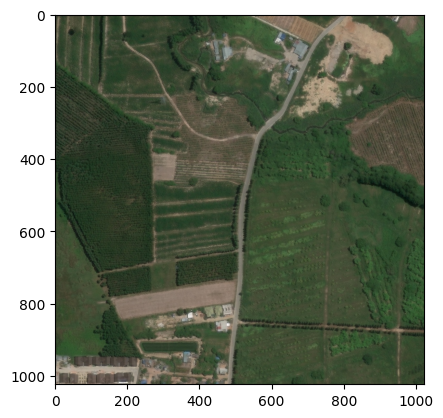

In [ ]:
from matplotlib import pyplot as plt
img = plt.imread('/kaggle/input/deepglobe-road-extraction-dataset/train/704600_sat.jpg')
plt.imshow(img)

In [ ]:
from glob import glob
def load_data(data_path, split=0.2):
    masks = sorted(glob(data_path + '/*mask.png'))
    images = sorted(glob(data_path + '/*sat.jpg'))
    size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=0.2, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=0.2, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=0.2, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=0.2, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

In [ ]:
from glob import glob
data_path = "/kaggle/input/deepglobe-road-extraction-dataset/train"
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(data_path)

In [ ]:
len(train_x), len(train_y), len(valid_x), len(valid_y), len(test_x), len(test_y)

(3984, 3984, 1246, 1246, 996, 996)

In [ ]:
def read_image(path):
    try:
        img = Image.open(path)
        img = img.resize((W, H))
        x = np.array(img, dtype=np.float32)
        x = x / 255.0
        return x
    except Exception as e:
        print(f"Error while reading image: {e}")
        return None


def read_mask(path):
    try:
        img = Image.open(path).convert('L')
        img = img.resize((W, H))
        x = np.array(img, dtype=np.float32)
        x = x / 255.0
        x = np.expand_dims(x, axis=-1)
        return x
    except Exception as e:
        print(f"Error while reading mask: {e}")
        return None


def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y


def tf_dataset(X, Y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)

    return dataset

In [ ]:
def show_random_sample():
    rand_index =random.randint(0, len(train_x) - 1)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(read_image(train_x[rand_index]))
    plt.title('Image')

    plt.subplot(1, 2, 2)
    plt.imshow(read_mask(train_y[rand_index]))
    plt.title('Mask')

    plt.show()

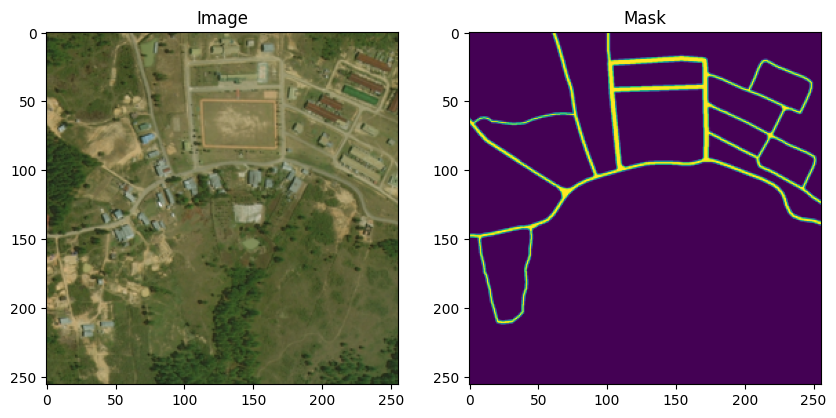

In [ ]:
show_random_sample()

In [ ]:
train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

train_steps = (len(train_x) // batch_size)
valid_steps = (len(valid_x) // batch_size)

In [ ]:
def unet(input_shape):
    # Define input layer
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Encoder part
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder part
    up6 = tf.keras.layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    concat6 = tf.keras.layers.concatenate([up6, conv4], axis=-1)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(concat6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = tf.keras.layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    concat7 = tf.keras.layers.concatenate([up7, conv3], axis=-1)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(concat7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    concat8 = tf.keras.layers.concatenate([up8, conv2], axis=-1)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(concat8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    concat9 = tf.keras.layers.concatenate([up9, conv1], axis=-1)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(concat9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output layer
    outputs = tf.keras.layers.Conv2D(1,1,padding="same", activation="sigmoid")(conv9)

    # Create the model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model


In [ ]:
model = unet((H,W,3))
metrics = [dice_coef, iou, Recall(), Precision()]
model.compile(loss="binary_crossentropy",
             optimizer=Adam(lr),
             metrics=metrics)

In [ ]:
history = model.fit(train_dataset,
                    epochs=num_epochs,
                    validation_data=valid_dataset,
                    steps_per_epoch=train_steps,
                    validation_steps=valid_steps)

Epoch 1/10
498/498 [==============================] - 350s 641ms/step - loss: 0.1857 - dice_coef: 0.0633 - iou: 0.0329 - recall: 0.0013 - precision: 0.0637 - val_loss: 0.1531 - val_dice_coef: 0.0795 - val_iou: 0.0414 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
498/498 [==============================] - 311s 625ms/step - loss: 0.1378 - dice_coef: 0.1302 - iou: 0.0702 - recall: 0.0095 - precision: 0.7195 - val_loss: 0.1270 - val_dice_coef: 0.1785 - val_iou: 0.0983 - val_recall: 0.0180 - val_precision: 0.8357
Epoch 3/10
498/498 [==============================] - 310s 622ms/step - loss: 0.1116 - dice_coef: 0.2633 - iou: 0.1526 - recall: 0.1560 - precision: 0.7471 - val_loss: 0.1083 - val_dice_coef: 0.2792 - val_iou: 0.1629 - val_recall: 0.1483 - val_precision: 0.8375
Epoch 4/10
498/498 [==============================] - 311s 625ms/step - loss: 0.0987 - dice_coef: 0.3377 - iou: 0.2043 - recall: 0.2544 - precision: 0.7810 - val_loss: 0.0995 - val_dice_coef: 0.3328 - val_i

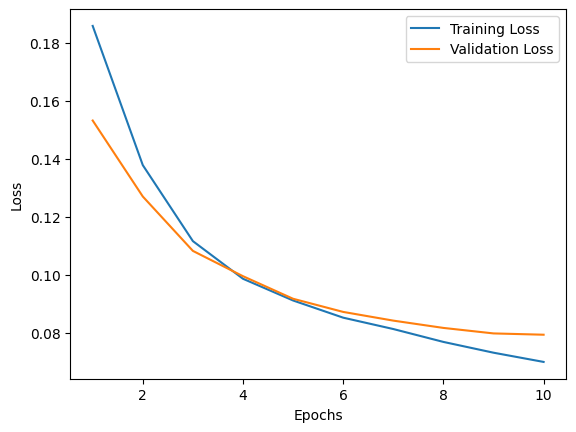

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the loss curves
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

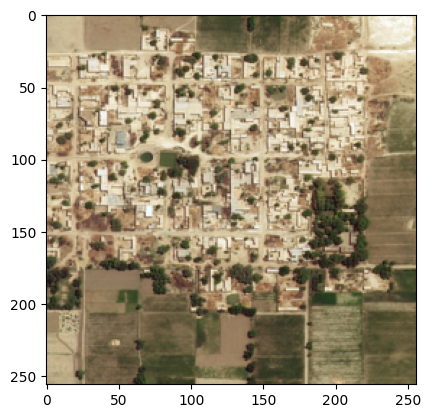

In [ ]:
img =read_image("/kaggle/input/deepglobe-road-extraction-dataset/test/100393_sat.jpg")
plt.imshow(img)

In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 256, 256, 3)

1/1 [==============================] - 3s 3s/step


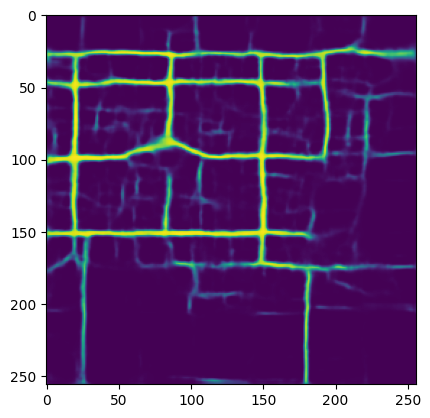

In [ ]:
pred = model.predict(img)
plt.imshow(pred[0,...])

In [ ]:
model.save('unet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
